### Exercise 2: Data Visualization

This exercise should help you to understand how to get a fast and easy overview of data, how to create powerful plots and how to interpret those plots.

#### a) Select a data source and get information about it
Some basic statistical informations visualised:
* Distribution of different classes
* Null value matrix
* etc

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = sns.load_dataset('penguins')

In [21]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


(array([152.,   0.,   0.,   0.,   0.,  68.,   0.,   0.,   0., 124.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

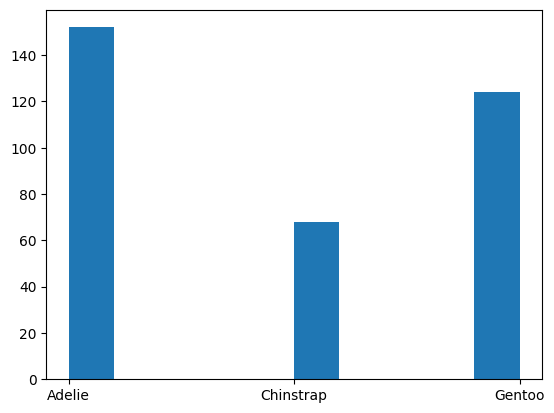

In [31]:
plt.hist(df.species)

Text(0, 0.5, 'Bill length in mm')

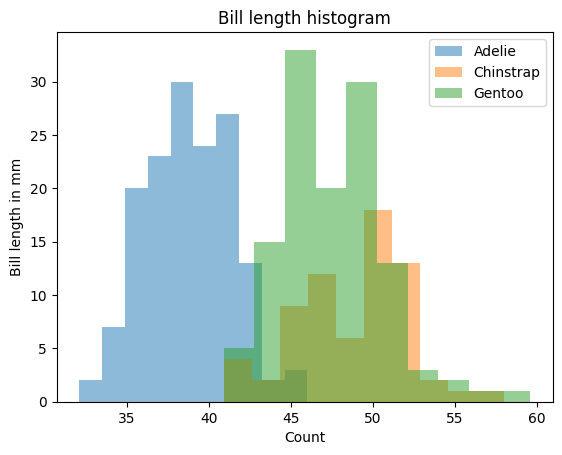

In [40]:
for speciesData in df.groupby("species")["bill_length_mm"]:
    plt.hist(speciesData[1], alpha=0.5)
plt.legend(df.species.unique())
plt.title("Bill length histogram")
plt.xlabel("Count")
plt.ylabel("Bill length in mm")

In [41]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

#### b) Create three plots to answer interesting questions about your dataset
Questions can be:
* Difference between Grass and Fire Pokemons?
* Survival rate on the titanic by gender and class?
* etc

In [43]:
# Do penguins with longer bills also have longer feet?
df_corr = df.corr()

C:\Users\basti\AppData\Local\Temp\ipykernel_21920\4044727994.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


<AxesSubplot: >

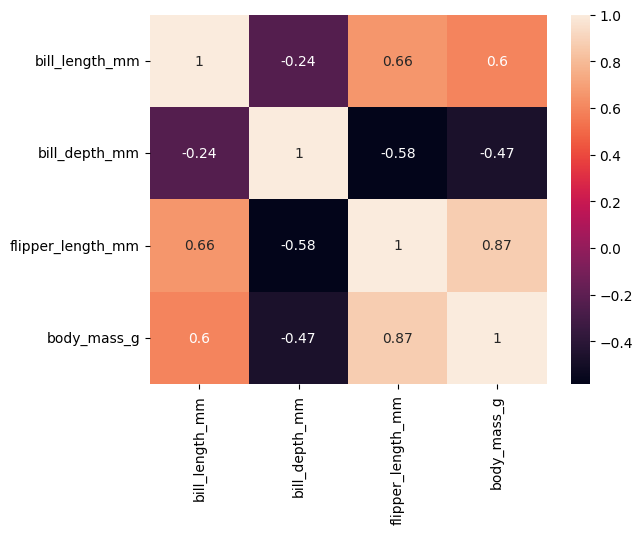

In [45]:
sns.heatmap(df_corr, annot=True)

There is a correlation of 0.66 between bill length and flipper length, so yes. The longer the bill, the longer the flippers. However, the longer the flippers, the narrower the bill! We can also conclude, that bigger (fatter) penguins are more likely to have narrower bills.

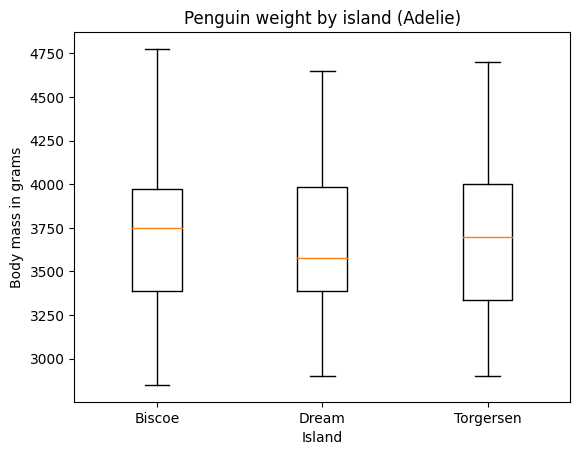

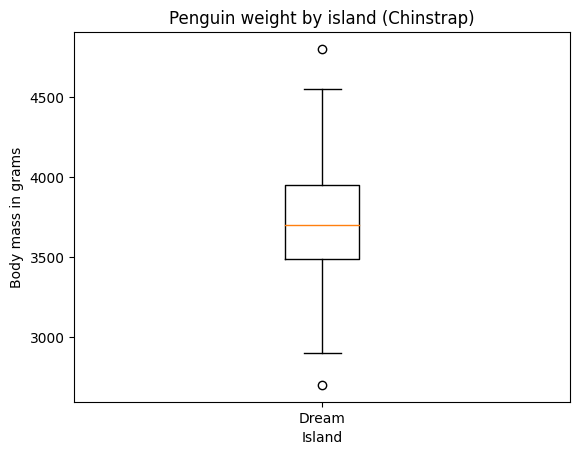

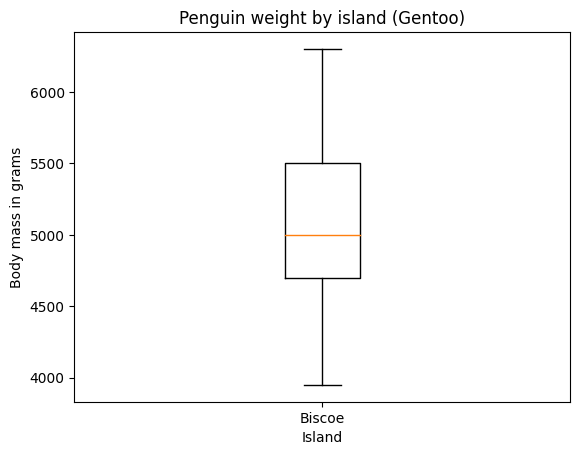

In [75]:
# Is there a size/mass difference between penguins of the same species on the different islands?
for species in df.species.unique():
    labels = [data[0] for data in df[df.species == species].groupby(["island"])["body_mass_g"]]
    plotdata = [data[1].dropna() for data in df[df.species == species].groupby(["island"])["body_mass_g"]]
    plt.boxplot(plotdata, labels=labels)
    plt.title(f"Penguin weight by island ({species})")
    plt.ylabel("Body mass in grams")
    plt.xlabel("Island")
    plt.show()